In [3]:
import torch
import torchvision as tv
import glob
import os
import sys
import numpy as np
import pandas as pd
import PIL
import cv2
import matplotlib.pyplot as plt
import time

In [5]:
class MountainDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir="./datasets/"):
        super(MountainDataset, self).__init__()
        if not os.path.isdir(root_dir):
            raise FileNotFoundError("Dir {} Error".format(root_dir))
        
        self._data = glob.glob(os.path.join(root_dir, "*/*.png"))
        self._root = root_dir
    def __getitem__(self, index):
        print(self._data[index])
        image = PIL.Image.open(self._data[index])
        print(image)
        data = image
        label = self._data[index].split("\\")[1]
        print(label)
        
        return (data, label)
    
    def __len__(self):
        return len(self._data)

In [ ]:

def run_one_epoch():    
    for inputs, labels in data_loader_training:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        predicted = torch.max(outputs.data, 1)[1]
        corrected += (predicted == labels)[1]
        
        # backward
        loss = criterion(outputs, labels)
        loss.backward()
        running_loss += loss.data.item()
        
        optimizer.step()
    
    running_loss /= len(data_loader_training)
    training_acc = corrected / len(data_loader_training)
    corrected = 0
    
    # testing
    model.eval()
    for inputs, labels in data_loader_testing:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        predicted = torch.max(outputs.data, 1)[1]
        corrected += (predicted == labels)[1]
    end = time.time()
    
    testing_acc = corrected / len(data_loader_testing)
    
    return (end-start, training_acc, testing_acc, running_loss)
    
def confusion_mat(model, data_loader):
    all_labels = []
    all_predicted = []
    model.eval()
    
    for inputs, labels in enumerate(data_loader):
        inputs = inputs.to(device)
        labels = inputs.to(device)
        
        all_label = np.concatenate((all_labels, labels.cpu()))
        
        outputs = model(inputs)
        predicted = torch.max(outputs.data, 1)[1]
        corrected += (predicted == labels).sum()
        
        all_predicted = np.concatenate((all_predicted, predicted.cpu()))
    
    confusion_matrix = pd.crosstab(pd.Series(all_labels, name="Actual"), pd.Series(all_predicted, name="Predicted"))


In [6]:
root_dir = "./datasets/"


transform_training = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(p=0.5),
    tv.transforms.RandomVerticalFlip(p=0.5),
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean = [0.5, 0.5, 0.5], std = [0.5, 0.5, 0.5])
])

transform_testing = tv.transforms.Compose([
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean = [0.5, 0.5, 0.5], std = [0.5, 0.5, 0.5])
])

dataset_training = MountainDataset(root_dir)
dataset_testing = MountainDataset(root_dir)

indices = torch.randperm(len(dataset_training)).tolist()
dataset_training = torch.utils.data.Subset(dataset_training, indices[:-50])
dataset_testing = torch.utils.data.Subset(dataset_testing, indices[-50:])

data_loader_training = torch.utils.data.DataLoader(dataset_training, batch_size = 2, shuffle=True, num_workers=1)
data_loader_testing = torch.utils.data.DataLoader(dataset_testing, batch_size = 2, shuffle=True, num_workers=1)


In [54]:
epoch_number = 10
best_acc = 0
best_loss = sys.float_info.max
for epoch in range(epoch_number):
    runtime, training_acc, testing_acc, loss = run_one_epoch()
    print("[Epoch #{}] runtime:{.5f} sec., train_acc:{}, test_acc:{}, loss:{}".format(epoch, runtime, training_acc, testing_acc, loss))
    
    if train_acc > best_acc:
        best_acc = train_acc
        best_loss = loss
        save_weight(model, "latest.pth")
    print()


print("Training complete. Best accuracy:{}, Best Loss:{}".format(best_acc, best_loss))

NameError: name 'run_one_epoch' is not defined

In [137]:
a,b=dataset_training.__getitem__(10)

./datasets\1\2050,450_China.png
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x1EA817B33C8>
1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


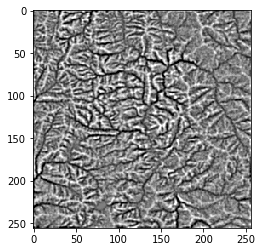

In [138]:
c=cv2.filter2D(np.array(a),5,
               0.3*np.array([
                   [-1,-1,-2,-1,-1],
                   [-1,0,3,0,-1],
                   [-2,3, 8,3,-2],
                   [-1,0,3,0,-1],
                   [-1,-1,-2,-1,-1],
               ]))
plt.imshow(c*0.01+0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


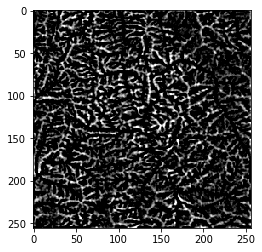

In [141]:
plt.imshow(c*0.02)

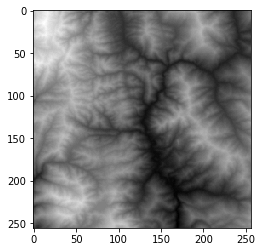

In [140]:
plt.imshow(a)